In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
paths = []
labels = []

dataset_path = '/content/drive/MyDrive/TESS Toronto emotional speech set data'

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print('Dataset is Loaded')


Dataset is Loaded


In [3]:
len(paths)

5600

In [4]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bite_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bean_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_beg_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bath_happy.wav']

In [5]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,happy
1,/content/drive/MyDrive/TESS Toronto emotional ...,happy
2,/content/drive/MyDrive/TESS Toronto emotional ...,happy
3,/content/drive/MyDrive/TESS Toronto emotional ...,happy
4,/content/drive/MyDrive/TESS Toronto emotional ...,happy


In [7]:
df['label'].value_counts()

,count
label,
happy,800
fear,800
neutral,800
ps,800
sad,800
angry,800
disgust,800


**EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='label', ylabel='count'>

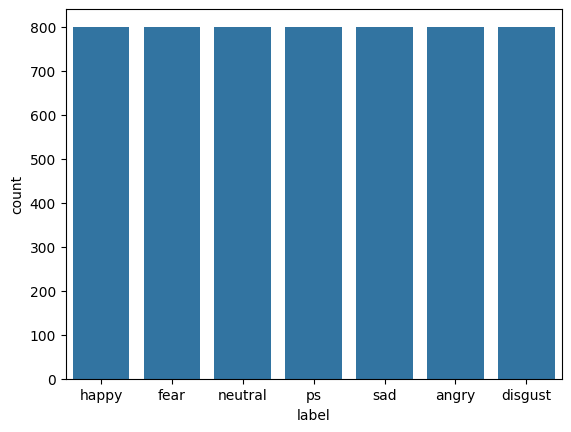

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

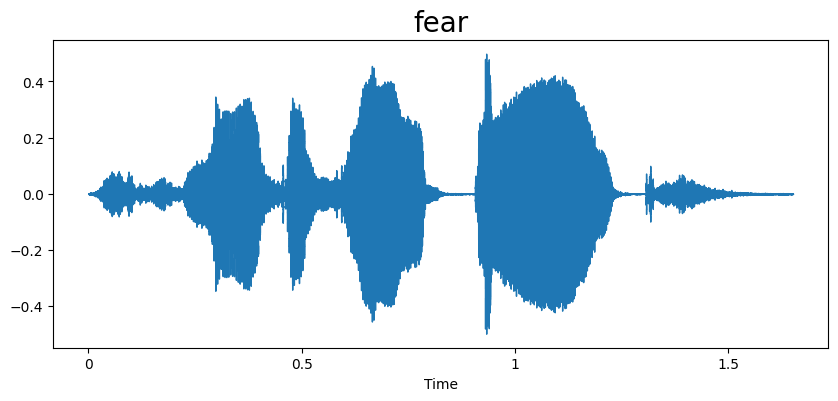

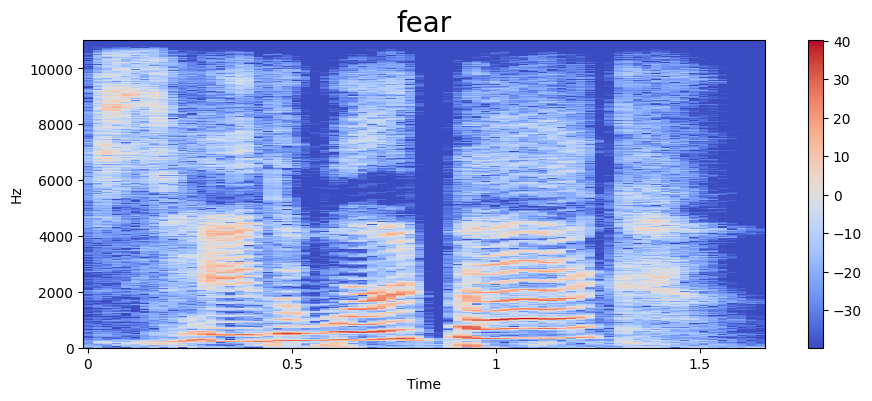

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

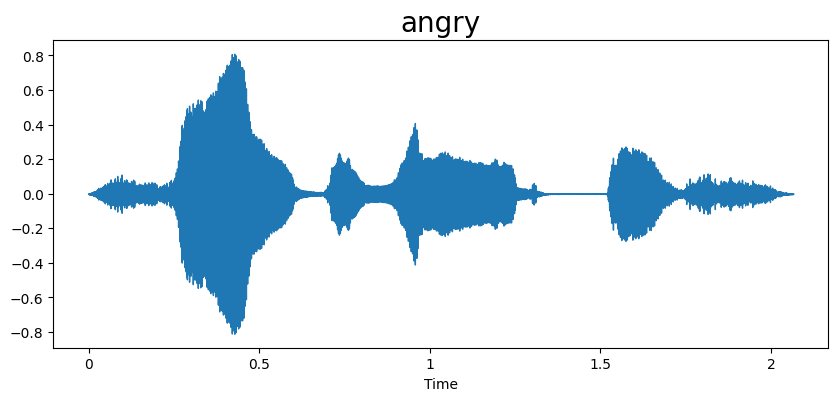

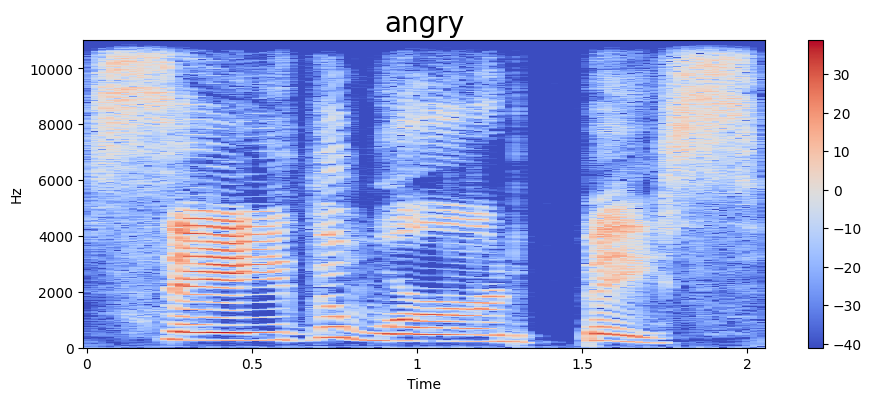

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

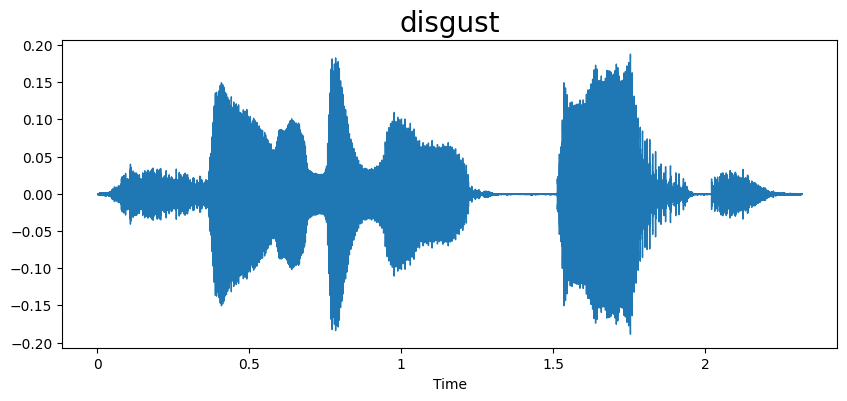

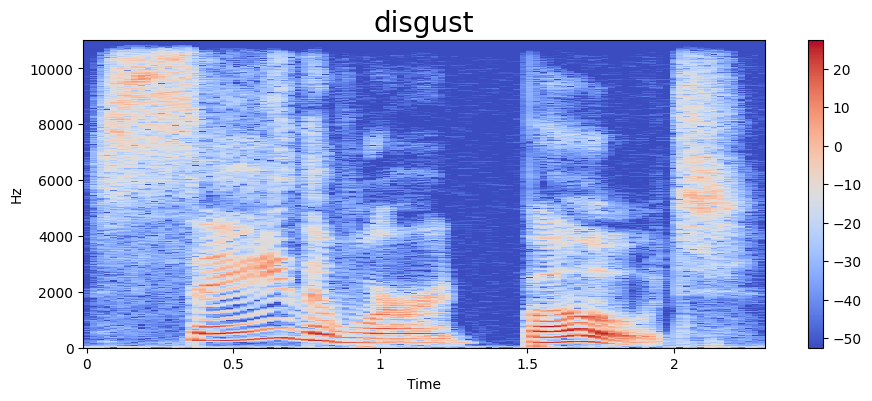

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

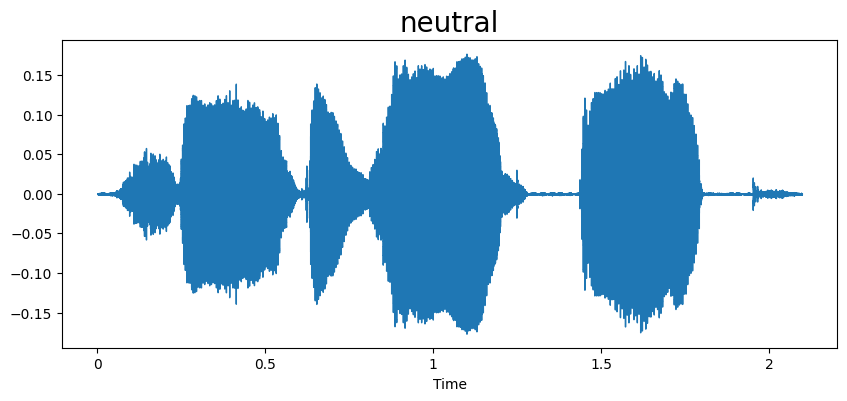

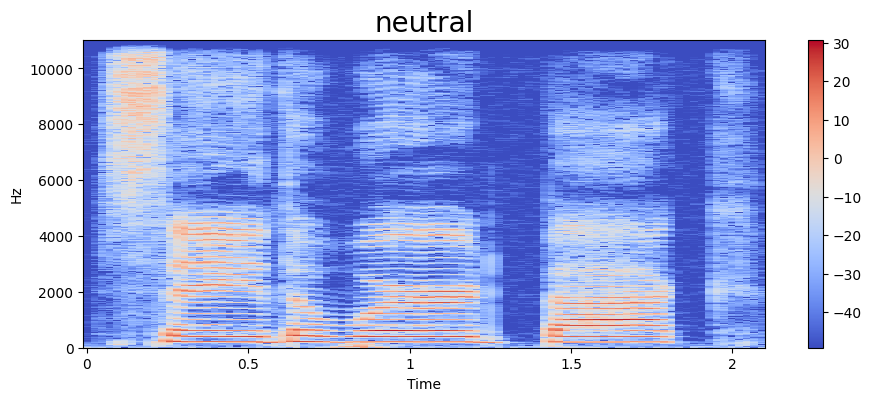

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

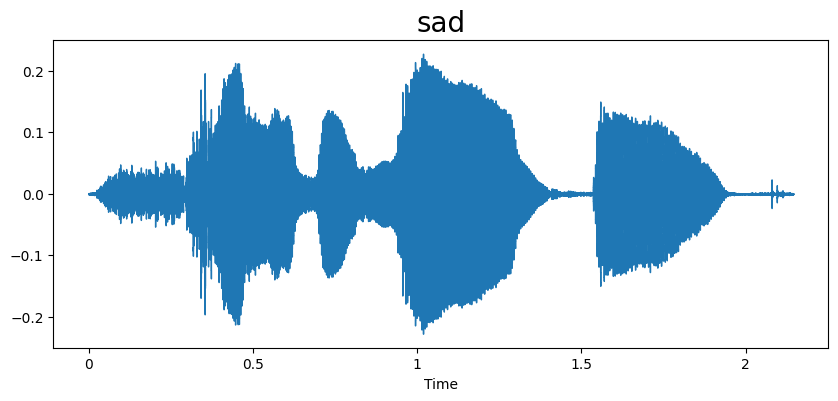

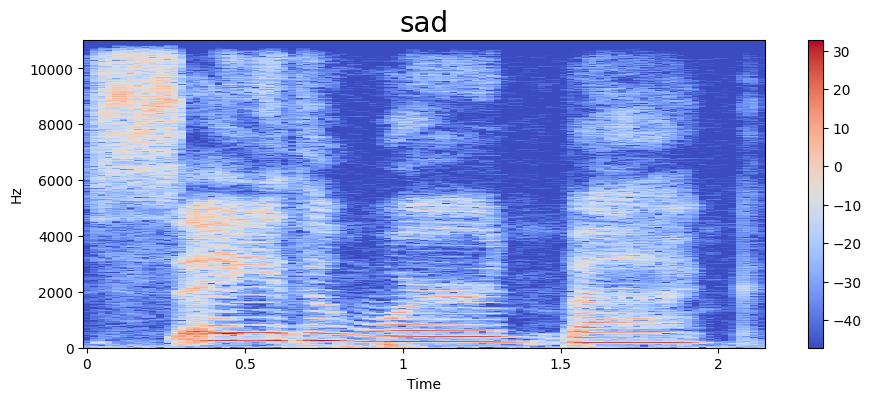

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

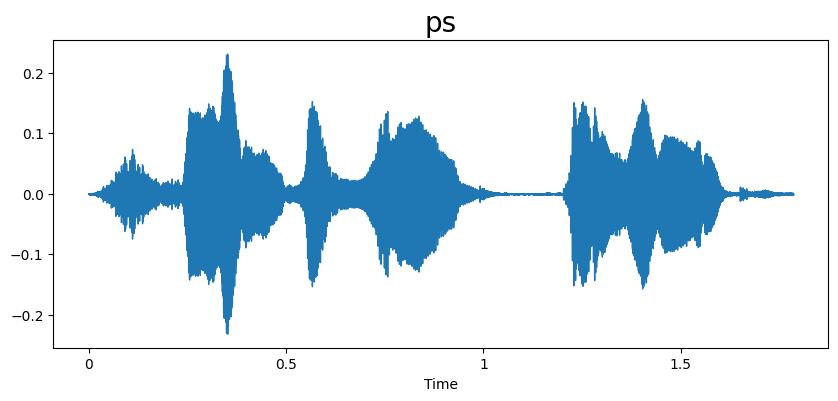

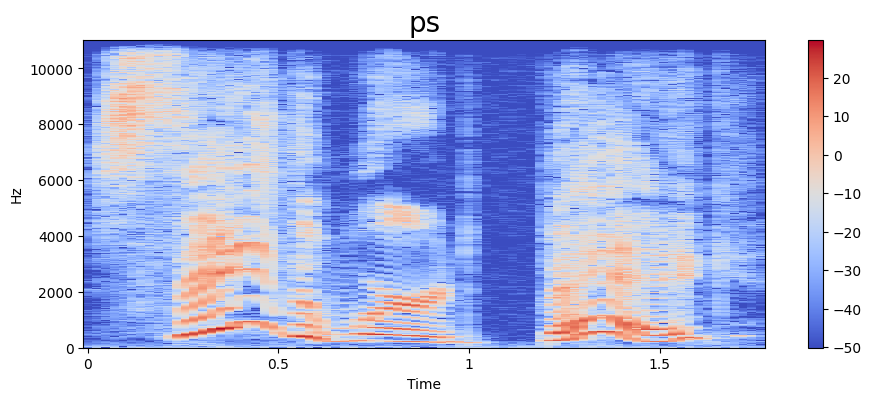

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

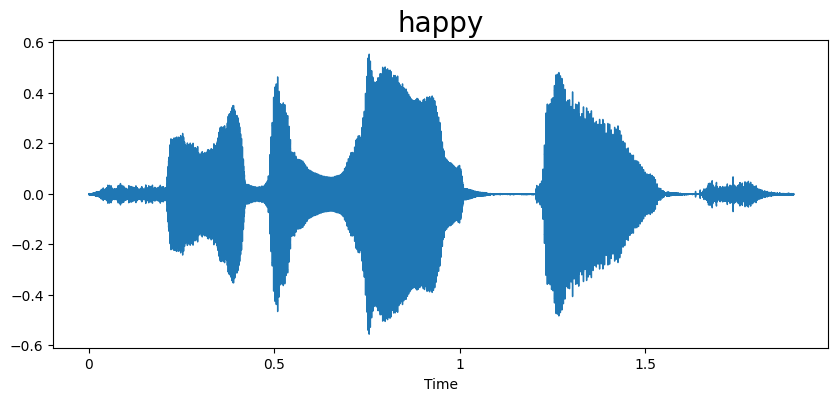

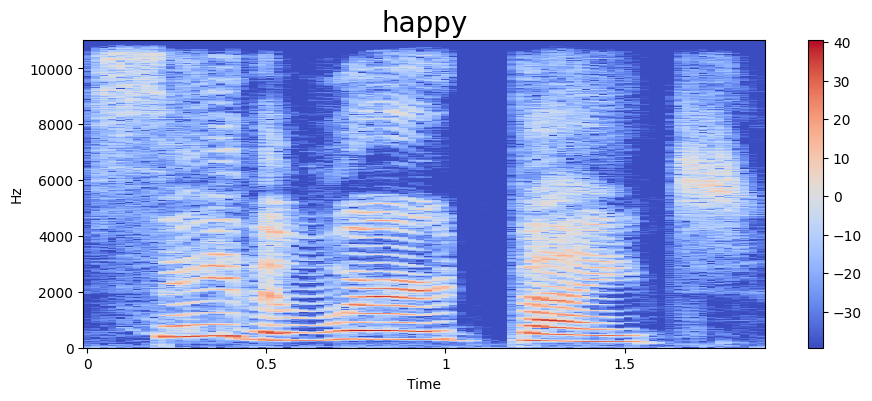

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**FEATURE EXTRACTION**

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-3.2317529e+02,  3.5721375e+01, -1.6336277e+01,  2.2842546e+01,
       -7.0319042e+00, -4.4397078e+00, -9.7919607e+00, -1.3435866e+01,
       -1.1424111e-02, -8.2205753e+00, -8.6941395e+00,  5.5996504e+00,
       -8.7881021e+00,  7.0131993e+00, -6.0686498e+00, -4.9140458e+00,
       -3.4859233e+00, -7.0437183e+00, -1.0216732e+01, -4.2658663e+00,
       -2.6620717e+00,  2.2428496e+00,  8.3728771e+00,  1.1725357e+01,
        8.7731123e+00,  9.3479557e+00,  3.8567147e+00,  3.6783834e+00,
        6.7561488e+00,  7.5801702e+00,  4.8358755e+00,  4.9888883e+00,
       -3.5754994e-02,  5.4346390e+00, -2.5392289e+00, -1.6048944e+00,
       -4.5700316e+00, -2.0542939e-01, -7.4949336e-01, -6.2622480e-02],
      dtype=float32)

In [20]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [21]:
X_mfcc

,speech
0,"[-323.1753, 35.721375, -16.336277, 22.842546, ..."
1,"[-326.12833, 69.966286, -14.238354, 20.211922,..."
2,"[-325.60648, 57.70321, 10.052183, 39.220478, 9..."
3,"[-318.67844, 58.399315, -14.353562, 30.029669,..."
4,"[-300.75027, 44.594646, -31.056608, 17.401653,..."
...,...
5595,"[-442.9591, 67.607025, -12.452667, -11.96258, ..."
5596,"[-403.40585, 83.16034, -2.5043783, -15.493323,..."
5597,"[-406.92343, 104.91605, -3.9979508, -34.856083..."
5598,"[-428.4035, 65.69212, 5.564823, -1.1533774, 2...."


In [22]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [23]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [24]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [25]:
y = y.toarray()

In [26]:
y.shape

(5600, 7)

**Create LSTM Model**

In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

**Plot Results**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40, 1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')  # Adjust output layer to number of classes
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=64)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 182ms/step - accuracy: 0.4536 - loss: 1.4192 - val_accuracy: 0.8694 - val_loss: 0.3381
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 205ms/step - accuracy: 0.8817 - loss: 0.3554 - val_accuracy: 0.9531 - val_loss: 0.1310
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - accuracy: 0.9430 - loss: 0.1900 - val_accuracy: 0.9342 - val_loss: 0.2092
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 208ms/step - accuracy: 0.9452 - loss: 0.1790 - val_accuracy: 0.9676 - val_loss: 0.0852
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9581 - loss: 0.1347 - val_accuracy: 0.9766 - val_loss: 0.0793
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - accuracy: 0.9793 - loss: 0.0751 - val_accuracy: 0.9654 - val_loss: 0.1032
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 222ms/step - accuracy: 0.9702 - loss: 0.0919 - val_accuracy: 0.9799 - val_loss: 0.0549
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 222ms/step - accuracy: 0.9750 - loss: 0.0815 - 

In [29]:
# Save in HDF5 format
model.save('/content/drive/MyDrive/model.h5')



In [30]:
!ls /content/drive/MyDrive/

'Assignment 4.gdoc'   Job_Placement_Data.csv	    'R Final Assignment.gdoc'
'Assignment 5.gdoc'  'LAB MANUAL.docx'		    'TESS Toronto emotional speech set data'
'Colab Notebooks'     model.h5			    'Untitled spreadsheet.gsheet'
 demo_angry.wav      'PowerBI Imp topics.log.gdoc'
 demo_happy.wav       program.ipynb


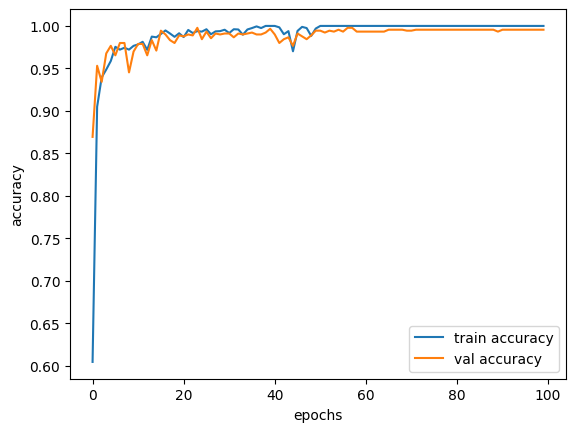

In [31]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

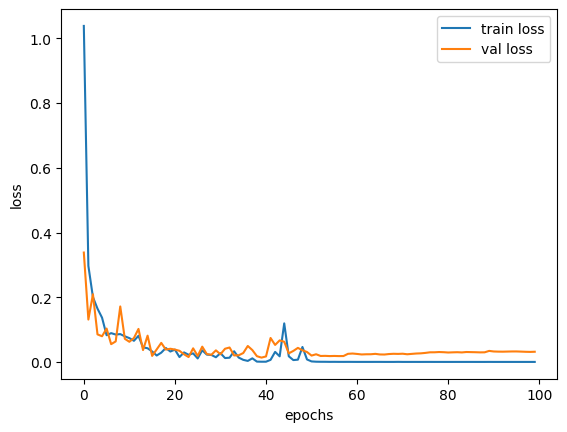

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**TESTING**

In [33]:
import numpy as np
import librosa
from keras.models import load_model
# Function to load and preprocess audio
def preprocess_audio(file_path):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract features (e.g., MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    # Average the MFCCs across time frames to get a fixed-size input
    mfccs = np.mean(mfccs.T, axis=0)

    # Reshape to (1, 40, 1) for the model
    mfccs = mfccs.reshape(1, 40, 1)

    return mfccs

# Path to your demo audio file
demo_audio_path = '/content/drive/MyDrive/demo_happy.wav'

# Preprocess the audio
audio_features = preprocess_audio(demo_audio_path)

# Make predictions
predictions = model.predict(audio_features)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to emotion labels (assuming you have a mapping)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class[0]]

print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
Predicted Emotion: Happy


In [34]:
demo_audio_path = '/content/drive/MyDrive/demo_angry.wav'

# Preprocess the audio
audio_features = preprocess_audio(demo_audio_path)

# Make predictions
predictions = model.predict(audio_features)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to emotion labels (assuming you have a mapping)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class[0]]

print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted Emotion: Angry


In [35]:
from google.colab import files
files.download('/content/drive/MyDrive/model.h5')  # Replace with your file path

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>